In [1]:
import glob
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statannot
import re
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils.optimizing_dim import angle_method, slope_method

In [3]:
MIN_NO_DIM = 1
MAX_NO_DIM = 10
NO_COLORS = 20
COMB_COLORS = 2

#### Files

In [4]:
files_s = sorted(glob.glob('output/*_optimization_results.csv'))
print(files_s)

['output/part_01_optimization_results.csv', 'output/part_02_optimization_results.csv', 'output/part_03_optimization_results.csv', 'output/part_04_optimization_results.csv', 'output/part_05_optimization_results.csv', 'output/part_06_optimization_results.csv', 'output/part_07_optimization_results.csv', 'output/part_08_optimization_results.csv', 'output/part_09_optimization_results.csv', 'output/part_10_optimization_results.csv', 'output/part_11_optimization_results.csv', 'output/part_12_optimization_results.csv', 'output/part_13_optimization_results.csv']


In [5]:
dim_s, loss_s = [], []
for filename in files_s:
    df = pd.read_csv(filename)
    dim_s.append(df['dim'].tolist())
    loss_s.append(df['loss'].tolist())
dim_s = np.array(dim_s)
loss_s = np.array(loss_s)
print(f'Number of participants: {len(loss_s)}')

Number of participants: 13


#### Plotting the loss

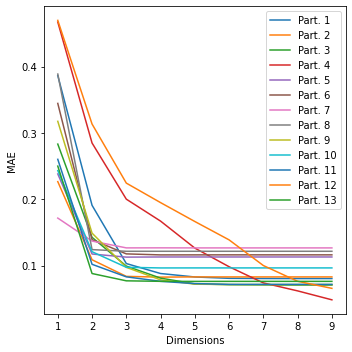

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
for i in range(len(loss_s)):
    axs.plot(loss_s[i] / 190, label=f'Part. {i+1}')
axs.set_xticklabels(np.arange(0, len(loss_s), 1))
axs.set_xlabel('Dimensions')
axs.set_ylabel('MAE')
axs.legend()
plt.tight_layout()
plt.savefig('output/fig/error_part.png')

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dim_2 v.s. dim_3: t-test paired samples, P_val=1.474e-03 stat=4.099e+00
dim_3 v.s. dim_4: t-test paired samples, P_val=1.302e-02 stat=2.912e+00
dim_4 v.s. dim_5: t-test paired samples, P_val=6.727e-02 stat=2.012e+00


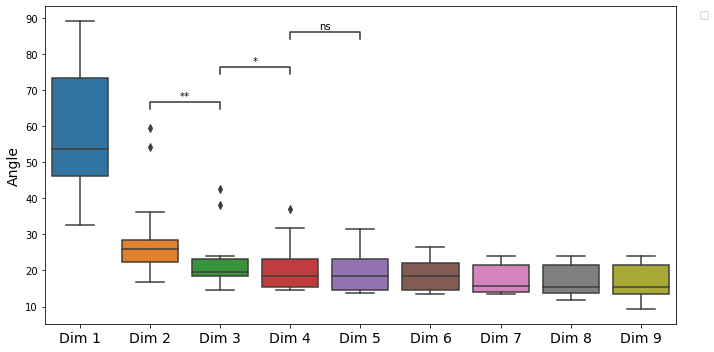

In [7]:
df_angle, df_labels = [], [] 
for i in range(len(loss_s)):
    for j in range(9):
        df_angle.append(loss_s[i, j].astype(float))
        df_labels.append(f'dim_{j+1}')
df = pd.DataFrame(np.concatenate((np.reshape(df_angle, (-1, 1)), np.reshape(df_labels, (-1, 1))), axis=1),
                  columns=['Data', 'Labels'])
df['Data'] = df['Data'].astype(float)
df.head()

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=df, x='Labels', y='Data', ax=axs)

box_pairs=[
    ("dim_2", "dim_3"),
    ("dim_3", "dim_4"),
    ("dim_4", "dim_5")
]
statannot.add_stat_annotation(axs, data=df, x='Labels', y='Data', box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2, comparisons_correction=None)
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Angle", fontsize=14)
axs.set_xticklabels(['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9'], fontsize=14)
axs.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.tight_layout()

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dim_2 v.s. dim_3: t-test paired samples, P_val=4.840e-03 stat=3.601e+00
dim_3 v.s. dim_4: t-test paired samples, P_val=3.461e-02 stat=2.444e+00
dim_4 v.s. dim_5: t-test paired samples, P_val=5.362e-02 stat=2.187e+00


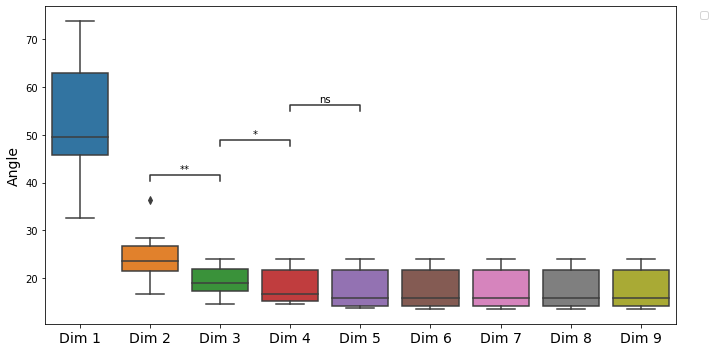

In [8]:
# Excluding participants 4 and 12
df_angle, df_labels = [], [] 
for i in range(len(loss_s)):
    if i not in (3, 11):
        for j in range(9):
            df_angle.append(loss_s[i, j].astype(float))
            df_labels.append(f'dim_{j+1}')
df = pd.DataFrame(np.concatenate((np.reshape(df_angle, (-1, 1)), np.reshape(df_labels, (-1, 1))), axis=1),
                  columns=['Data', 'Labels'])
df['Data'] = df['Data'].astype(float)
df.head()

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=df, x='Labels', y='Data', ax=axs)

box_pairs=[
    ("dim_2", "dim_3"),
    ("dim_3", "dim_4"),
    ("dim_4", "dim_5")
]
statannot.add_stat_annotation(axs, data=df, x='Labels', y='Data', box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2, comparisons_correction=None)
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Angle", fontsize=14)
axs.set_xticklabels(['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9'], fontsize=14)
axs.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.tight_layout()

#### Plotting the angles

In [9]:
angle_s = []
for filename in files_s:
    df = pd.read_csv(filename)
    angle = angle_method(df['loss'], min(df['dim']), max(df['dim'])+1, plot_curve=False)
    angle_s.append(angle)
angle_s = np.array(angle_s)

labels = np.arange(MIN_NO_DIM, MAX_NO_DIM)
angle_s = pd.DataFrame(angle_s.astype(float), columns=labels)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dim_2 v.s. dim_3: t-test paired samples, P_val=3.235e-02 stat=-2.419e+00
dim_3 v.s. dim_4: t-test paired samples, P_val=7.731e-03 stat=3.193e+00
dim_3 v.s. dim_5: t-test paired samples, P_val=4.152e-02 stat=2.282e+00
dim_3 v.s. dim_6: t-test paired samples, P_val=1.824e-03 stat=3.981e+00
dim_3 v.s. dim_7: t-test paired samples, P_val=8.190e-04 stat=4.431e+00
dim_3 v.s. dim_8: t-test paired samples, P_val=6.721e-04 stat=4.545e+00


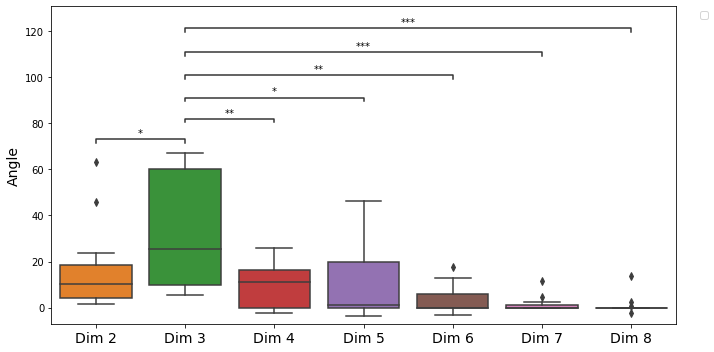

In [10]:
df_angle, df_labels = [], [] 
for i in range(len(loss_s)):
    for j in range(9):
        df_angle.append(angle_s.iloc[i, j].astype(float))
        df_labels.append(f'dim_{j+1}')
df = pd.DataFrame(np.concatenate((np.reshape(df_angle, (-1, 1)), np.reshape(df_labels, (-1, 1))), axis=1),
                  columns=['Data', 'Labels'])
df['Data'] = df['Data'].astype(float)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=df, x='Labels', y='Data', ax=axs)

box_pairs=[
    ("dim_3", "dim_2"),
    ("dim_3", "dim_4"),
    ("dim_3", "dim_5"),
    ("dim_3", "dim_6"),
    ("dim_3", "dim_7"),
    ("dim_3", "dim_8")
]
statannot.add_stat_annotation(axs, data=df, x='Labels', y='Data', box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2, comparisons_correction=None)
axs.set_xlabel("", fontsize=14)
axs.set_ylabel("Angle", fontsize=14)
axs.set_xticklabels(['Dim 1', 'Dim 2', 'Dim 3', 'Dim 4', 'Dim 5', 'Dim 6', 'Dim 7', 'Dim 8', 'Dim 9'], fontsize=14)
axs.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.tight_layout()
plt.savefig('output/fig/boxplot_part.png', dpi=100)

#### Plotting the slopes

In [11]:
slope_s = []
for filename in files_s:
    df = pd.read_csv(filename)
    slope = slope_method(df['loss'], min(df['dim']), max(df['dim'])+1, plot_curve=False)
    slope_s.append(slope)
slope_s = np.array(slope_s)

labels = np.arange(MIN_NO_DIM, MAX_NO_DIM)
slope_s = pd.DataFrame(slope_s.astype(float), columns=labels)

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dim_2 v.s. dim_3: t-test paired samples, P_val=3.973e-04 stat=4.851e+00
dim_2 v.s. dim_4: t-test paired samples, P_val=9.887e-06 stat=7.269e+00
dim_2 v.s. dim_5: t-test paired samples, P_val=1.064e-05 stat=7.215e+00
dim_2 v.s. dim_6: t-test paired samples, P_val=6.622e-06 stat=7.566e+00
dim_2 v.s. dim_7: t-test paired samples, P_val=1.202e-05 stat=7.127e+00
dim_2 v.s. dim_8: t-test paired samples, P_val=9.706e-06 stat=7.282e+00


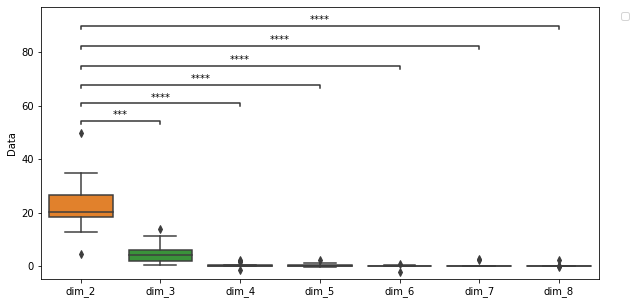

In [12]:
df_angle, df_labels = [], [] 
for i in range(len(loss_s)):
    for j in range(9):
        df_angle.append(slope_s.iloc[i, j].astype(float))
        df_labels.append(f'dim_{j+1}')
df = pd.DataFrame(np.concatenate((np.reshape(df_angle, (-1, 1)), np.reshape(df_labels, (-1, 1))), axis=1),
                  columns=['Data', 'Labels'])
df['Data'] = df['Data'].astype(float)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(data=df, x='Labels', y='Data', ax=axs)

box_pairs=[
    ("dim_2", "dim_3"),
    ("dim_2", "dim_4"),
    ("dim_2", "dim_5"),
    ("dim_2", "dim_6"),
    ("dim_2", "dim_7"),
    ("dim_2", "dim_8")
]
statannot.add_stat_annotation(axs, data=df, x='Labels', y='Data', box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2, comparisons_correction=None)
axs.set_xlabel("", fontsize=14)
axs.legend(loc='upper left', bbox_to_anchor=(1.03, 1))